In [12]:
import os

path_im = []
for path, dirs, files in os.walk('/home/aschern/project/datasets/Potsdam/5_Labels_for_participants'):
    for f in files:
        if f[-3:] == 'tif':
            path_im.append(os.path.join(path, f))

In [46]:
from skimage.io import imread, imshow
from scipy.misc import imresize
from matplotlib import pyplot as plt

%matplotlib inline


offset = 1500
for img_name in path_im:
    file = img_name.replace('label', 'RGB').replace('5_Labels_for_participants', '2_Ortho_RGB')
    lab = imread(file)
    for i in range(6000 // offset):
        for j in range(6000 // offset):
            crop_lab = lab[i*offset:(i+1)*offset, j*offset:(j+1)*offset]
            new_img_name = file.replace('2_Ortho_RGB', 'new_rgb')[:-4] + str(i) + str(j)+'.tif'
            imsave(new_img_name, crop_lab)
            imshow(crop_lab)

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_rgb/top_potsdam_7_10_RGB30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


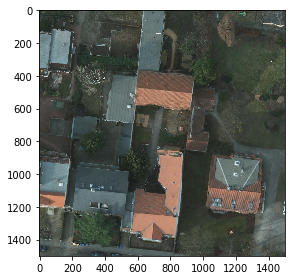

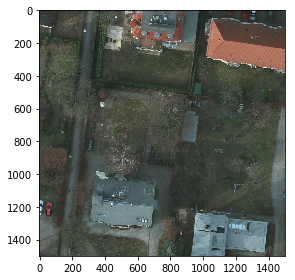

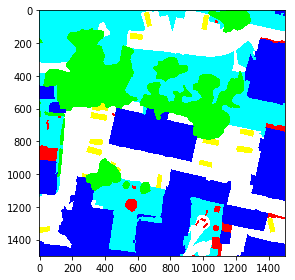

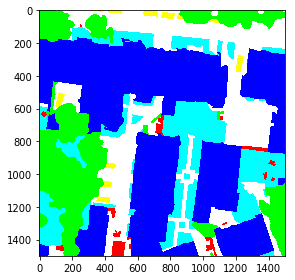

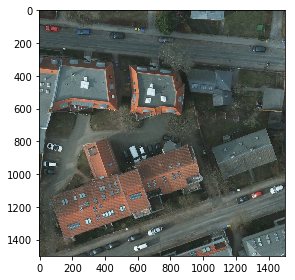

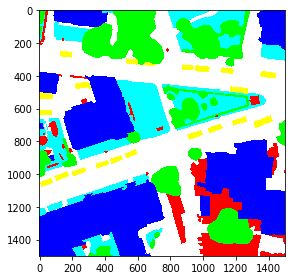

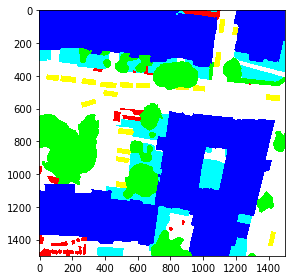

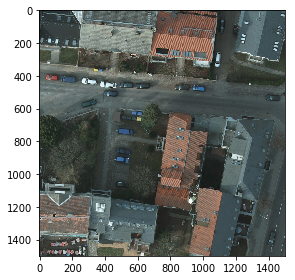

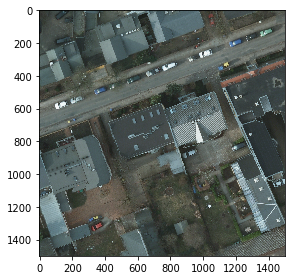

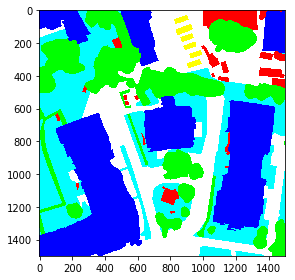

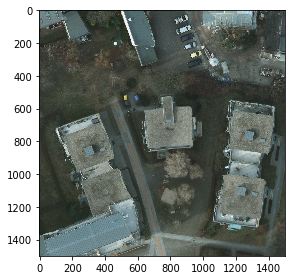

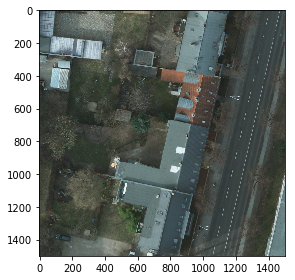

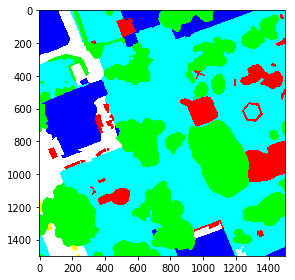

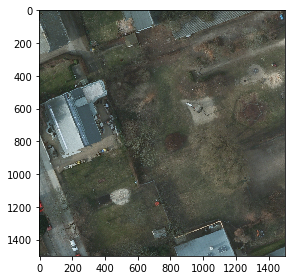

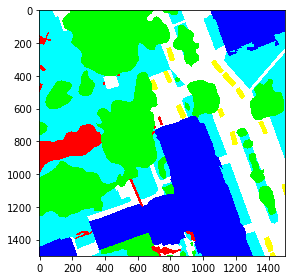

KeyboardInterrupt: 

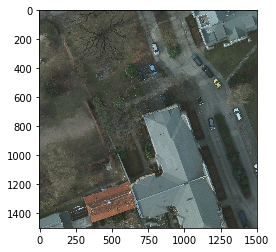

In [14]:
from skimage.io import imread, imshow
from scipy.misc import imresize
from matplotlib import pyplot as plt

%matplotlib inline


offset = 1500
for img_name in path_im:
    img = imread(img_name)
    file = img_name.replace('label', 'RGB').replace('5_Labels_for_participants', '2_Ortho_RGB')
    lab = imread(file)
    for i in range(6000 // offset):
        for j in range(6000 // offset):
            crop = img[i*offset:(i+1)*offset, j*offset:(j+1)*offset]
            imshow(crop)
            plt.show()
            crop_lab = lab[i*offset:(i+1)*offset, j*offset:(j+1)*offset]
            imshow(crop_lab)
            plt.show()

In [39]:
labels_to_rgb = {
    0: (255, 255, 255),
    1: (0, 0, 255),
    2: (0, 255, 255),
    3: (0, 255, 0),
    4: (255, 255, 0),
    5: (255, 0, 0)}

In [43]:
def img_to_rgb(img):
    image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    for i in labels_to_rgb.keys():
        image[img == i] = labels_to_rgb[i]
    return image

In [15]:
rgb_to_labels = {
    (255, 255, 255): 0,
    (0, 0, 255): 1,
    (0, 255, 255): 2,
    (0, 255, 0): 3,
    (255, 255, 0): 4,
    (255, 0, 0) : 5}

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


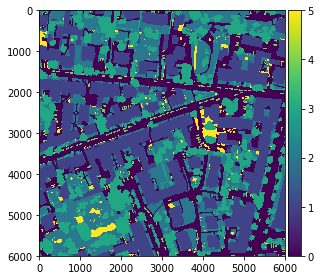

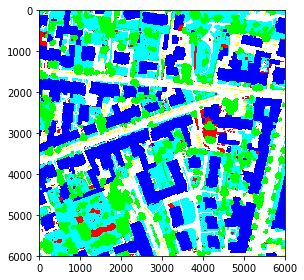

In [44]:
import numpy as np
from skimage.color.colorconv import rgb2grey

def convert_key(x):
    return (0.2125 * x[0] + 0.7154 * x[1] + 0.0721 * x[2]) / 255

def rgb_to_lab(img):
    image = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    for col in rgb_to_labels:
        c = convert_key(col)
        image[img == c] = rgb_to_labels[col]
    return image

image = rgb2grey(imread(path_im[0]))
lab = rgb_to_lab(image)
imshow(lab)
plt.show()
imshow(img_to_rgb(lab))

In [48]:
from skimage.io import imread, imshow, imsave
from scipy.misc import imresize
from matplotlib import pyplot as plt

%matplotlib inline


offset = 1500
for img_name in path_im:
    lab = imread(img_name)
    for i in range(6000 // offset):
        for j in range(6000 // offset):
            crop = lab[i*offset:(i+1)*offset, j*offset:(j+1)*offset]
            image = rgb_to_lab(rgb2grey(crop))
            new_img_name = img_name.replace('5_Labels_for_participants', 'new_labels')[:-4] + str(i) + str(j)+'.tif'
            imsave(new_img_name, image)

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_4_11_label00.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_4_11_label01.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_4_11_label02.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_4_11_label03.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skim

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_7_label03.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_7_label10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_7_label11.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_7_label12.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_10_label13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_10_label20.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_10_label21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_10_label22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skim

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_2_12_label22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_2_12_label23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_2_12_label30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_2_12_label31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skim

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_9_label31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_9_label32.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_9_label33.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_11_label00.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_5_11_label00.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_5_11_label01.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_5_11_label02.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_5_11_label03.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skim

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_2_11_label03.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_2_11_label10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_2_11_label11.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_2_11_label12.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skim

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_4_10_label13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_4_10_label20.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_4_10_label21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_4_10_label22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skim

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_3_11_label22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_3_11_label23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_3_11_label30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_3_11_label31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skim

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_6_12_label33.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_6_8_label00.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_6_8_label01.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_6_8_label02.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_12_label03.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_12_label10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_12_label11.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/aschern/project/datasets/Potsdam/new_labels/top_potsdam_7_12_label12.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/aschern/anaconda3/lib/python3.6/site-packages/skim